In [33]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [34]:
# Loading the datasets
bookingcars = pd.read_csv('BookingCars.csv')
promorevenue = pd.read_csv('PromoRevenue.csv')
memberfirsttransaction = pd.read_csv('MemberFirstTransaction.csv')


In [35]:
# Merge datasets on common columns
data = pd.merge(bookingcars, promorevenue, on=['booking_id', 'member_id'], how='inner')
data = pd.merge(data, memberfirsttransaction, on=['member_id'], how='inner')


In [36]:
# Convert datetime columns to datetime data type
for column in ['created_datetime', 'request_start_datetime', 'request_end_datetime', 'first_created_datetime', 'signup_datetime']:
    data[column] = pd.to_datetime(data[column])


In [37]:
data

,year_week,year_month,city,booking_id,created_datetime,request_start_datetime,request_end_datetime,member_id,member_age,member_gender,...,car_model,car_insured_value,gross_revenue,net_revenue,rental_fee,SCDW_fee,delivery_fee,coupon_code,first_created_datetime,signup_datetime
0,2022-08,2022-02,KV,180984,2022-02-22 11:23:46,2022-02-23 12:00:00,2022-02-25 12:00:00,103,47.0,male,...,TUCSON,46000,286.0,244.6,276.0,0,10.0,DRIVEON15,2020-10-30 11:04:01,2019-10-14 11:33:29
1,2022-20,2022-05,KV,241844,2022-05-18 15:59:39,2022-05-21 09:00:00,2022-05-24 09:00:00,103,47.0,male,...,TUCSON,46000,454.0,343.0,444.0,0,10.0,RAYADRIVE25,2020-10-30 11:04:01,2019-10-14 11:33:29
2,2022-17,2022-04,KV,224527,2022-04-26 15:16:16,2022-04-28 12:00:00,2022-05-01 00:00:00,103,47.0,male,...,X-TRAIL,59000,634.0,520.6,567.0,57,10.0,DRIVEON20,2020-10-30 11:04:01,2019-10-14 11:33:29
3,2022-23,2022-06,KV,259590,2022-06-10 00:00:00,2022-06-11 00:00:00,2022-06-14 16:00:00,103,47.0,male,...,X-TRAIL,59000,634.0,509.0,624.0,0,10.0,SINI25,2020-10-30 11:04:01,2019-10-14 11:33:29
4,2022-16,2022-04,KV,220429,2022-04-22 11:42:59,2022-04-23 15:00:00,2022-04-26 15:00:00,103,47.0,male,...,VENTO,34000,345.0,246.0,330.0,0,15.0,BERSYUKUR30,2020-10-30 11:04:01,2019-10-14 11:33:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28166,2022-26,2022-06,KK,273083,2022-06-29 23:30:00,2022-06-30 10:00:00,2022-07-03 00:00:00,1416418,23.0,male,...,BEZZA,45700,427.0,227.0,417.0,0,10.0,JOMTREVO50,2022-06-29 23:30:00,2022-06-29 12:16:12
28167,2022-26,2022-06,KV,273428,2022-06-30 12:17:17,2022-07-07 00:00:00,2022-07-12 00:00:00,1416532,33.0,male,...,BEZZA,31000,500.0,353.0,490.0,0,10.0,JOMTREVO30,2022-06-30 12:17:17,2022-06-29 12:48:54
28168,2022-26,2022-06,JB,273937,2022-06-30 22:37:32,2022-07-02 00:00:00,2022-07-03 00:00:00,1416731,23.0,female,...,MYVI,35000,291.0,153.0,276.0,0,15.0,JOMTREVO50,2022-06-30 22:37:32,2022-06-29 13:49:45
28169,2022-26,2022-06,KV,273160,2022-06-30 01:17:25,2022-07-01 00:00:00,2022-07-04 00:00:00,1417136,41.0,male,...,ALTIS,45000,505.0,305.0,450.0,45,10.0,JOMTREVO50,2022-06-30 01:17:25,2022-06-29 16:03:19


## Cleansing Step

In [38]:
# Dataset metadata
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28171 entries, 0 to 28170
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year_week               28171 non-null  object        
 1   year_month              28171 non-null  object        
 2   city                    28171 non-null  object        
 3   booking_id              28171 non-null  int64         
 4   created_datetime        28171 non-null  datetime64[ns]
 5   request_start_datetime  28171 non-null  datetime64[ns]
 6   request_end_datetime    28171 non-null  datetime64[ns]
 7   member_id               28171 non-null  int64         
 8   member_age              28124 non-null  float64       
 9   member_gender           27923 non-null  object        
 10  car_id                  28171 non-null  int64         
 11  car_age                 28171 non-null  int64         
 12  car_type                28171 non-null  object

In [39]:
#Number of missing values in the columns
data.isnull().sum()

year_week                   0
year_month                  0
city                        0
booking_id                  0
created_datetime            0
request_start_datetime      0
request_end_datetime        0
member_id                   0
member_age                 47
member_gender             248
car_id                      0
car_age                     0
car_type                    0
car_brand                   0
car_model                   0
car_insured_value           0
gross_revenue               0
net_revenue                 0
rental_fee                  0
SCDW_fee                    0
delivery_fee                0
coupon_code                 0
first_created_datetime      0
signup_datetime             0
dtype: int64

In [40]:
# Total Missing Data
total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()
print('Total Missing Values: ',total_missing)
print('--------------')

# Missing Data percentage
percent_missing = (total_missing/total_cells)*100
print(f"The percentage of missing values in the dataset is {percent_missing:.3f}%.")

Total Missing Values:  295
--------------
The percentage of missing values in the dataset is 0.044%.


In [41]:
#Total number of rows and columns before data cleansing
data.shape

(28171, 24)

In [42]:
#Different methods exist to fix missing values, such as dropping and filling via putting the mean of column values or 0.0 or existing dominant value.
#It depends on the conditions, such as the number of missing values, the importance of the column, the impact on the rest of the columns, being categorical or nominal values and so on.

data['member_age'] = data.member_age.fillna(data['member_age'].mean())

#Considering the small number of missing values in comparison to the volume of data, we can drop the rest 
data = data.dropna()

In [43]:
data.shape

(27923, 24)

In [44]:
#Number of missing values in the columns (there isn't any more left)
data.isnull().any()

year_week                 False
year_month                False
city                      False
booking_id                False
created_datetime          False
request_start_datetime    False
request_end_datetime      False
member_id                 False
member_age                False
member_gender             False
car_id                    False
car_age                   False
car_type                  False
car_brand                 False
car_model                 False
car_insured_value         False
gross_revenue             False
net_revenue               False
rental_fee                False
SCDW_fee                  False
delivery_fee              False
coupon_code               False
first_created_datetime    False
signup_datetime           False
dtype: bool

In [45]:
#Identifying anomalous data (is there any other value)
unique_genders = data['member_gender'].unique()
print(unique_genders)

['male' 'female']


In [46]:
#Identifying outlier data    
outlierData = data[(data['member_age'] < 0) | (data['member_age'] > 100)]
outlierData

# Note: I didn't take any action on the rest of the columns. 
# For instance, some outliers in Gross Revenue are observed, but I don't know if they are normal or abnormal because of my lack of knowledge about the business.  

,year_week,year_month,city,booking_id,created_datetime,request_start_datetime,request_end_datetime,member_id,member_age,member_gender,...,car_model,car_insured_value,gross_revenue,net_revenue,rental_fee,SCDW_fee,delivery_fee,coupon_code,first_created_datetime,signup_datetime
8989,2022-03,2022-01,KV,162415,2022-01-17 23:37:06,2022-01-21 22:30:00,2022-01-22 22:30:00,757882,-46.0,female,...,ALZA,21000,109.0,54.5,109.0,0,0.0,JOMTREVO50,2022-01-17 23:37:06,2022-01-14 15:20:37


In [47]:
#Drop the identified outlier data
data = data.drop(8989)
data.shape

(27922, 24)

In [48]:
#Identifying anomalous data
import re

pattern = r'[^\x00-\x7F+™√∞≈íÑ¢]'
contains_special_chars = {}

for col in data.columns:
    if data[col].dtype != 'object':
        continue

    contains_special_chars[col] = data[col].apply(lambda x: bool(re.search(pattern, str(x))))

contains_special_chars_df = pd.DataFrame(contains_special_chars)

In [49]:
#Drop the identified anomalous data
data = data[~contains_special_chars_df.any(axis=1)]
data.shape

(27734, 24)

In [50]:
#Save cleansed data
data.to_csv('cleansed_data.csv', index=False)

## EDA Step

In [51]:
# Descriptive statistics
print(data.describe())


          booking_id     member_id    member_age        car_id       car_age  \
count   27734.000000  2.773400e+04  27734.000000  27734.000000  27734.000000   
mean   215994.323249  6.529472e+05     33.011077  21600.373116      5.499964   
std     35472.321464  4.123502e+05      9.429762   9961.837176      2.699719   
min    154100.000000  6.000000e+00     13.000000     58.000000      1.000000   
25%    185059.250000  2.707020e+05     26.000000  16568.000000      4.000000   
50%    216920.000000  6.980890e+05     31.000000  24675.000000      5.000000   
75%    247722.250000  9.727030e+05     38.000000  29078.000000      7.000000   
max    274047.000000  1.419875e+06     82.000000  36507.000000     13.000000   

       car_insured_value  gross_revenue   net_revenue    rental_fee  \
count       2.773400e+04   27734.000000  27734.000000  27734.000000   
mean        7.001816e+04     341.019754    259.485694    327.021304   
std         4.581833e+05     323.333537    291.395856    318.95093

In [52]:
# a. Total bookings
total_bookings = len(data['booking_id'].unique())
print(f"Total Bookings: {total_bookings}")

Total Bookings: 27734


In [53]:
# b. Average coupon rate
def extract_number(s):
    return re.findall(r'\d+$', s)

# Apply function to extract numbers
data['coupon_rate_numeric'] = data['coupon_code'].apply(lambda x: float(extract_number(x)[0]) if extract_number(x) else np.nan)

# Calculate the average of the numeric coupon rate
average_coupon_rate = data['coupon_rate_numeric'].mean()

print(f"Average Coupon Rate: {average_coupon_rate:.2f}")

Average Coupon Rate: 36.99


In [54]:
# c. Average gross basket size
# Total number of units sold
total_units_sold = data['member_id'].nunique()

# Total number of orders
total_books = data['booking_id'].count()

# Average basket size
average_basket_size = total_books / total_units_sold 

print(f"Average Basket Size: {average_basket_size:}")


Average Basket Size: 1.7585441633377719


In [55]:
# d. Average booking lead time
data['created_datetime'] = pd.to_datetime(data['created_datetime'])
data['request_start_datetime'] = pd.to_datetime(data['request_start_datetime'])
data['booking_lead_time'] = (data['request_start_datetime'] - data['created_datetime']).dt.days
average_booking_lead_time = data['booking_lead_time'].mean()
print(f"Average Booking Lead Time: {average_booking_lead_time:.2f} days")



Average Booking Lead Time: 4.13 days


In [56]:
# e. Average booking duration
data['request_end_datetime'] = pd.to_datetime(data['request_end_datetime'])
data['booking_duration'] = (data['request_end_datetime'] - data['request_start_datetime']).dt.days
average_booking_duration = data['booking_duration'].mean()
print(f"Average Booking Duration: {average_booking_duration:.2f} days")

Average Booking Duration: 1.84 days


In [57]:
# f. Average delivery fee
average_delivery_fee = data['delivery_fee'].mean()
print(f"Average Delivery Fee: {average_delivery_fee:.2f}")

Average Delivery Fee: 11.03


In [58]:
# g. Lag time from member signup to MFT
data['member_signup_datetime'] = pd.to_datetime(data['signup_datetime'])
data['mft_datetime'] = pd.to_datetime(data['first_created_datetime'])
data['lag_time_to_mft'] = (data['mft_datetime'] - data['member_signup_datetime']).dt.days
average_lag_time_to_mft = data['lag_time_to_mft'].mean()
print(f"Average Lag Time from Member Signup to MFT: {average_lag_time_to_mft:.2f} days")

Average Lag Time from Member Signup to MFT: 94.11 days


In [59]:
# h. Member age
average_member_age = data['member_age'].mean()
print(f"Average Member Age: {average_member_age:.2f} years")

Average Member Age: 33.01 years


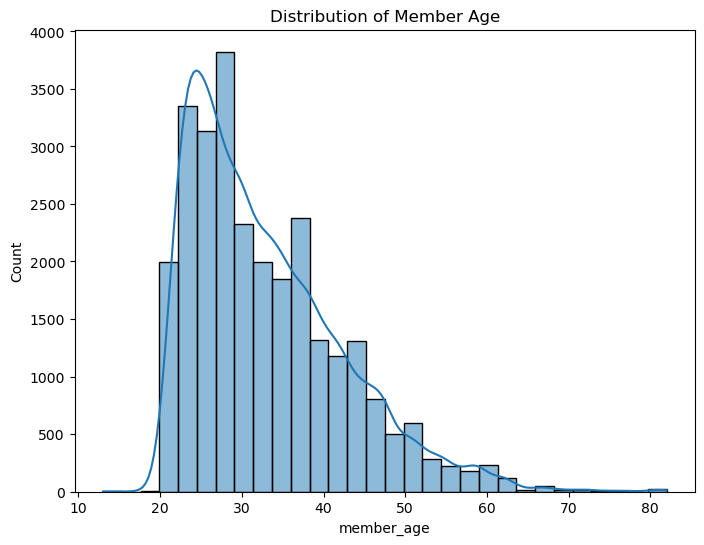

In [60]:
# Checking the distribution of member age
plt.figure(figsize=(8, 6))
sns.histplot(data['member_age'], bins=30, kde=True)
plt.title('Distribution of Member Age')
plt.show()

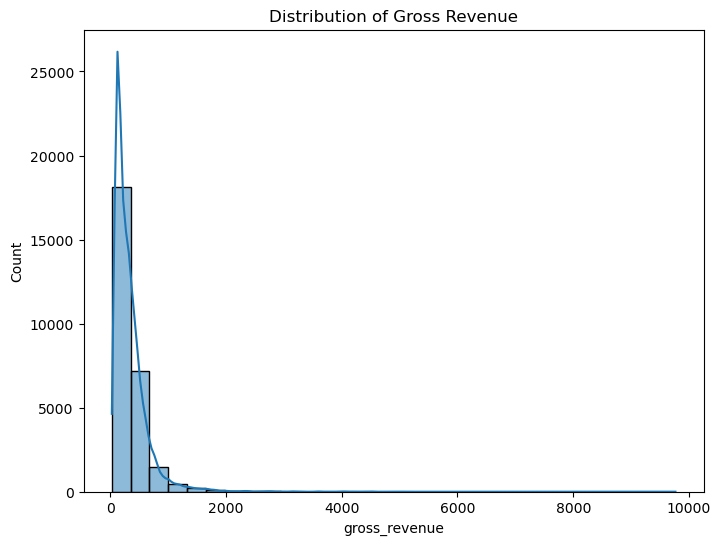

In [61]:
# Checking the distribution of gross revenue
plt.figure(figsize=(8, 6))
sns.histplot(data['gross_revenue'], bins=30, kde=True)
plt.title('Distribution of Gross Revenue')
plt.show()

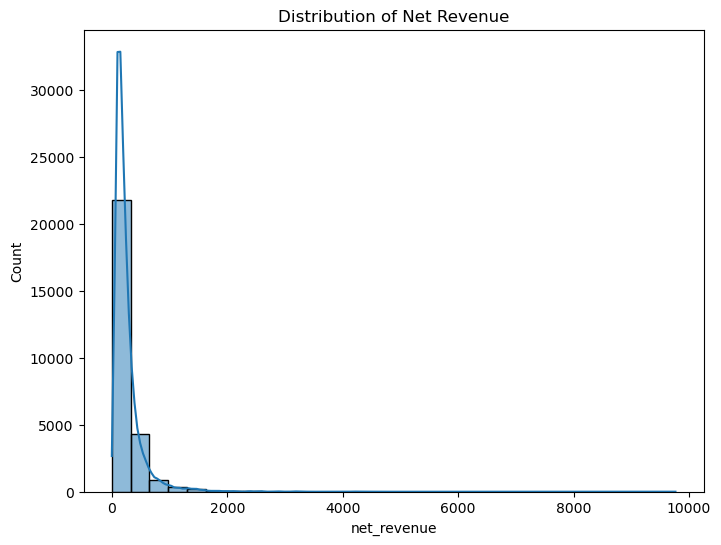

In [62]:
# Checking the distribution of net revenue
plt.figure(figsize=(8, 6))
sns.histplot(data['net_revenue'], bins=30, kde=True)
plt.title('Distribution of Net Revenue')
plt.show()

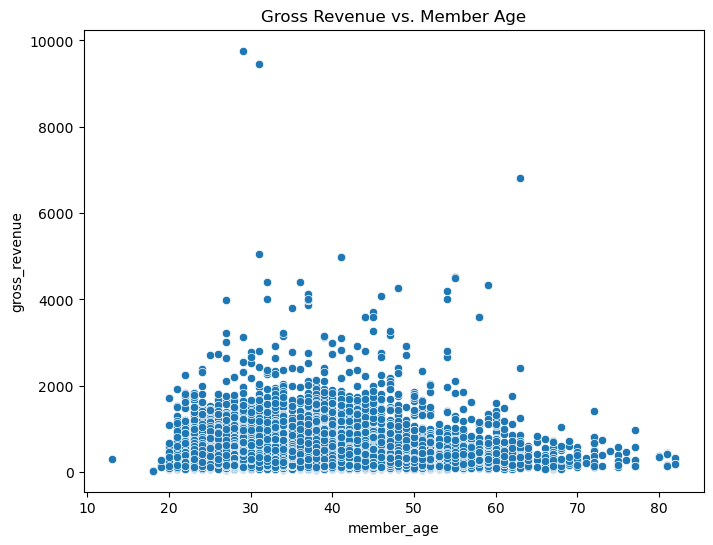

In [63]:
# Checking the relationship between gross revenue and member age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='member_age', y='gross_revenue', data=data)
plt.title('Gross Revenue vs. Member Age')
plt.show()

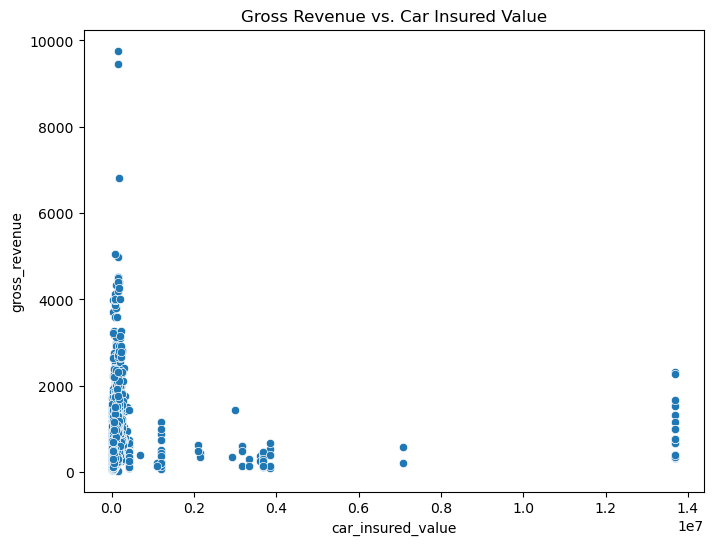

In [64]:
# Checking the relationship between gross revenue and car insured value
plt.figure(figsize=(8, 6))
sns.scatterplot(x='car_insured_value', y='gross_revenue', data=data)
plt.title('Gross Revenue vs. Car Insured Value')
plt.show()

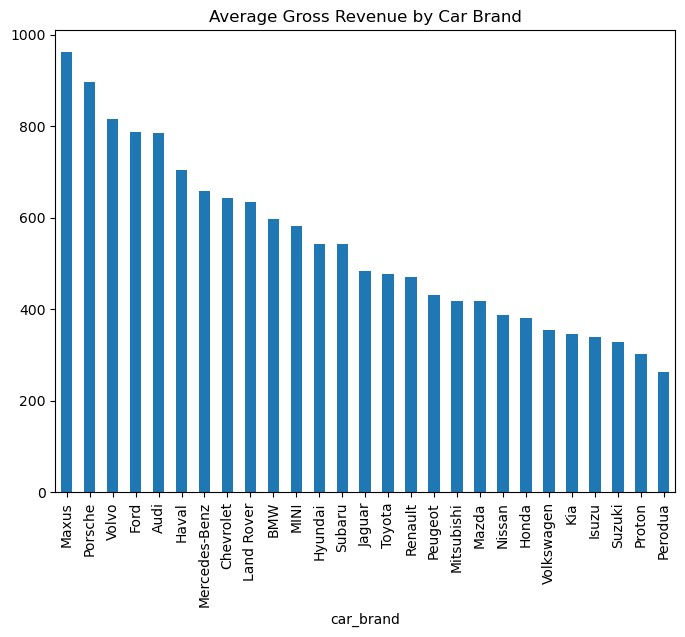

In [65]:
# Checking the average gross revenue by car brand
plt.figure(figsize=(8, 6))
data.groupby('car_brand')['gross_revenue'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Gross Revenue by Car Brand')
plt.show()

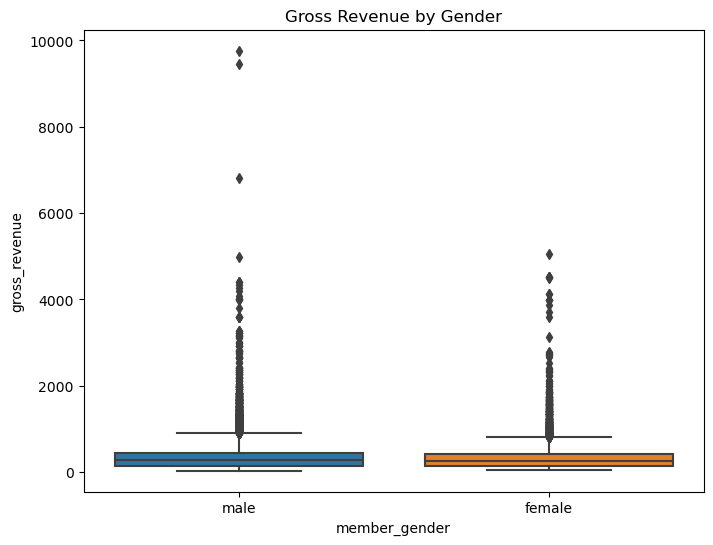

In [66]:
# Checking the distribution of gross revenue by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='member_gender', y='gross_revenue', data=data)
plt.title('Gross Revenue by Gender')
plt.show()

In [67]:
# Calculate booking lead time
data['booking_lead_time'] = (data['request_start_datetime'] - data['created_datetime']).dt.days

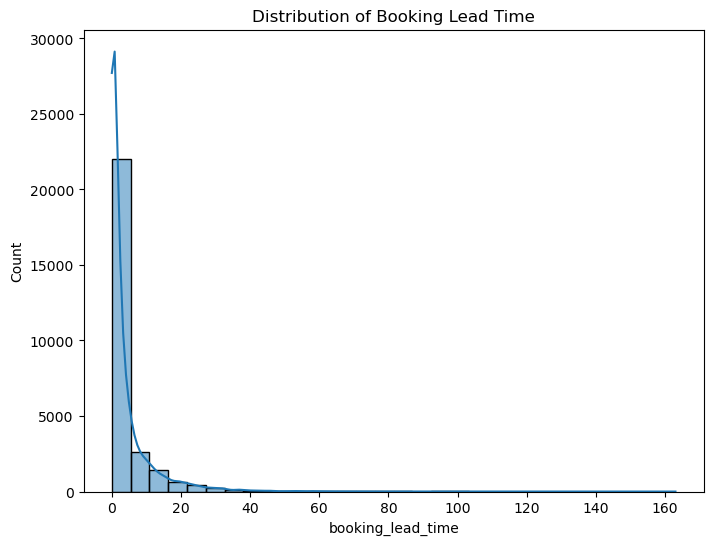

In [68]:
# Checking the distribution of booking lead time
plt.figure(figsize=(8, 6))
sns.histplot(data['booking_lead_time'], bins=30, kde=True)
plt.title('Distribution of Booking Lead Time')
plt.show()

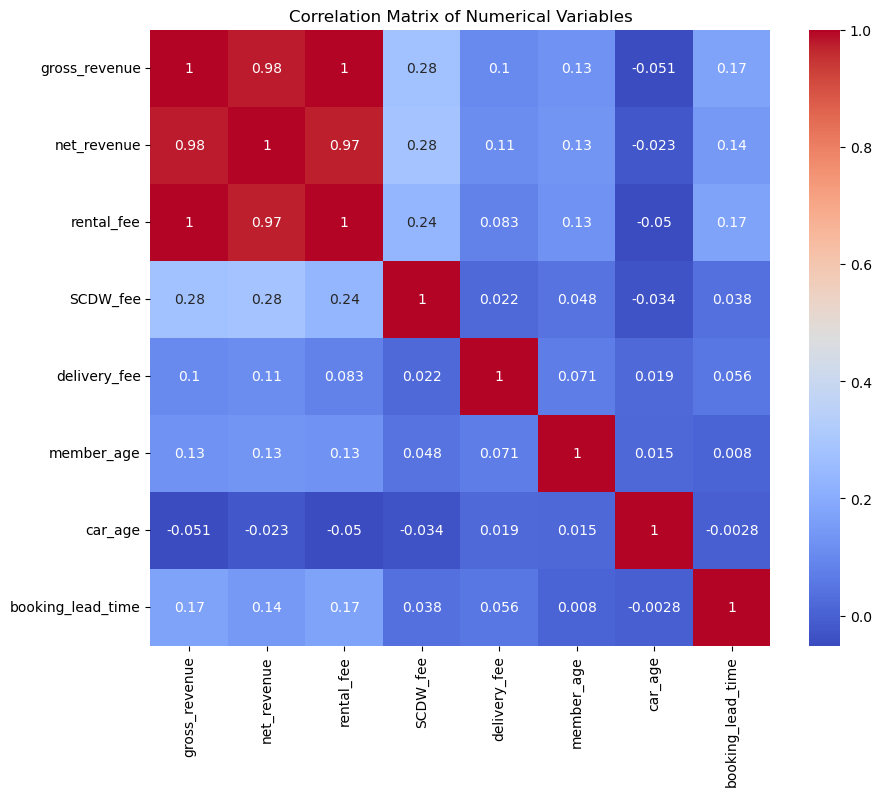

In [69]:
# Correlation matrix of numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(data[['gross_revenue', 'net_revenue', 'rental_fee', 'SCDW_fee', 'delivery_fee', 'member_age', 'car_age', 'booking_lead_time']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

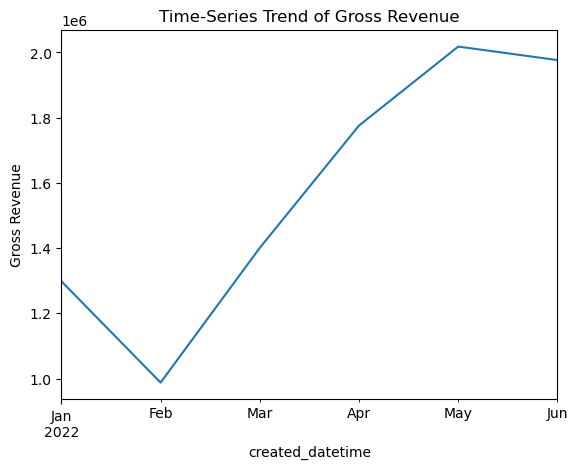

In [70]:
# Time-series trends of gross revenue
data.set_index('created_datetime', inplace=True)
data.resample('M')['gross_revenue'].sum().plot()
plt.title('Time-Series Trend of Gross Revenue')
plt.ylabel('Gross Revenue')
plt.show()

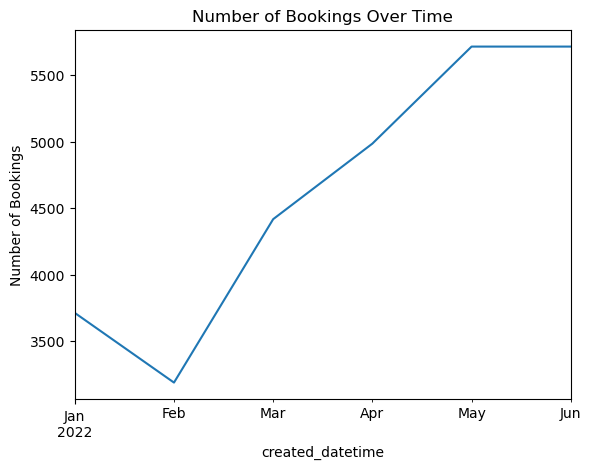

In [71]:
# Number of bookings over time
data.resample('M')['booking_id'].count().plot()
plt.title('Number of Bookings Over Time')
plt.ylabel('Number of Bookings')
plt.show()

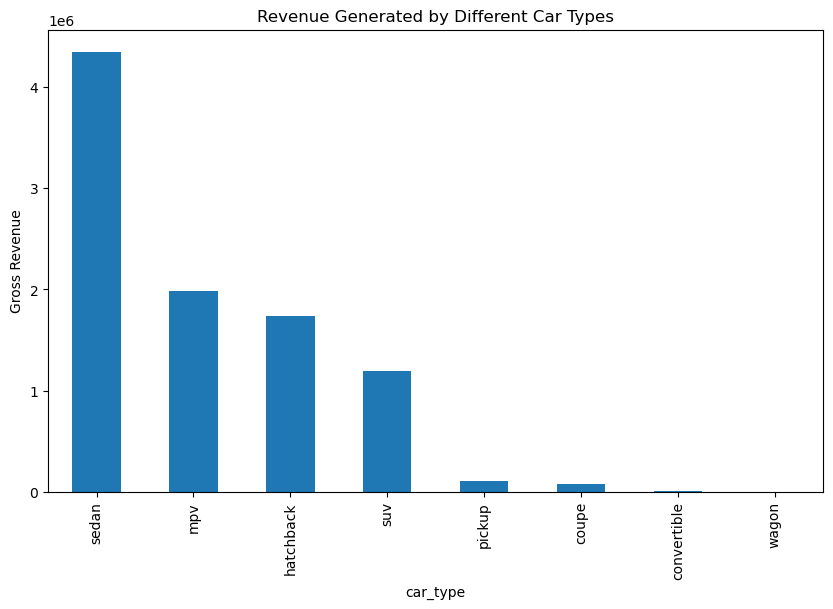

In [72]:
# Revenue generated by different car types
plt.figure(figsize=(10, 6))
data.groupby('car_type')['gross_revenue'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Revenue Generated by Different Car Types')
plt.ylabel('Gross Revenue')
plt.show()

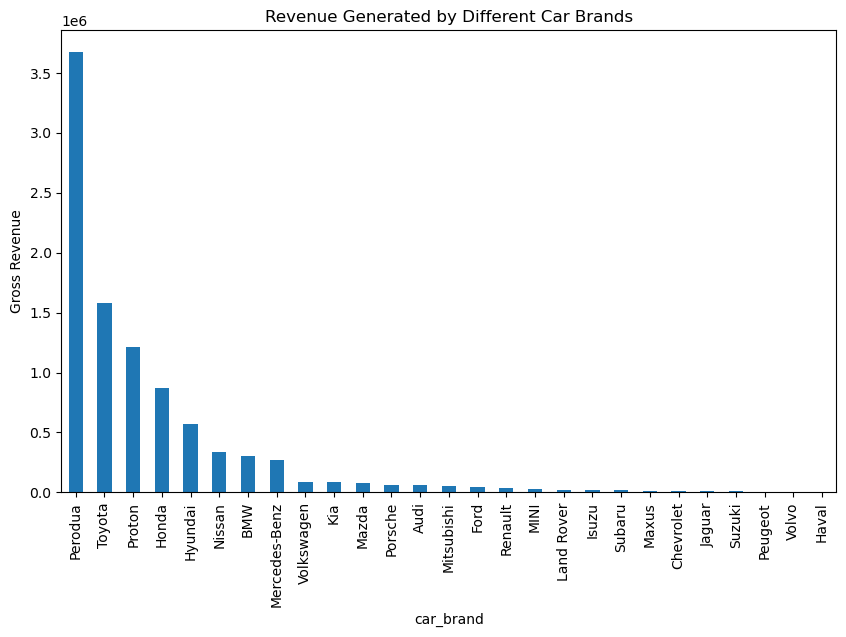

In [73]:
# Revenue generated by different car brands
plt.figure(figsize=(10, 6))
data.groupby('car_brand')['gross_revenue'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Revenue Generated by Different Car Brands')
plt.ylabel('Gross Revenue')
plt.show()

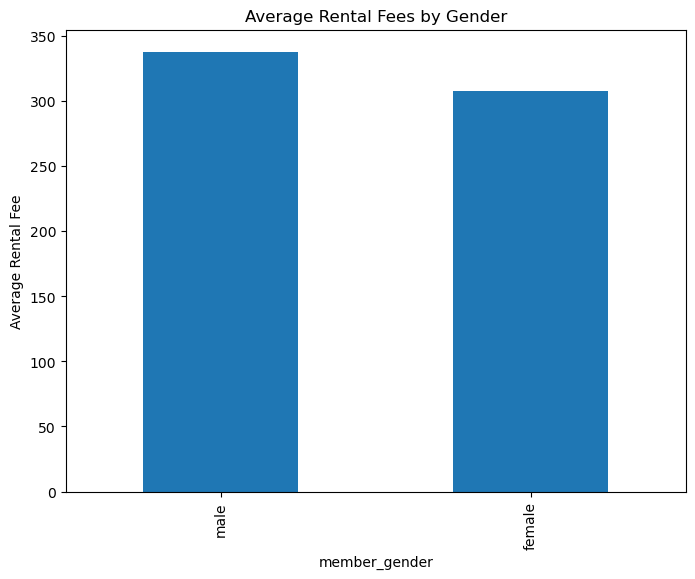

In [74]:
# Average rental fees by gender
plt.figure(figsize=(8, 6))
data.groupby('member_gender')['rental_fee'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Rental Fees by Gender')
plt.ylabel('Average Rental Fee')
plt.show()

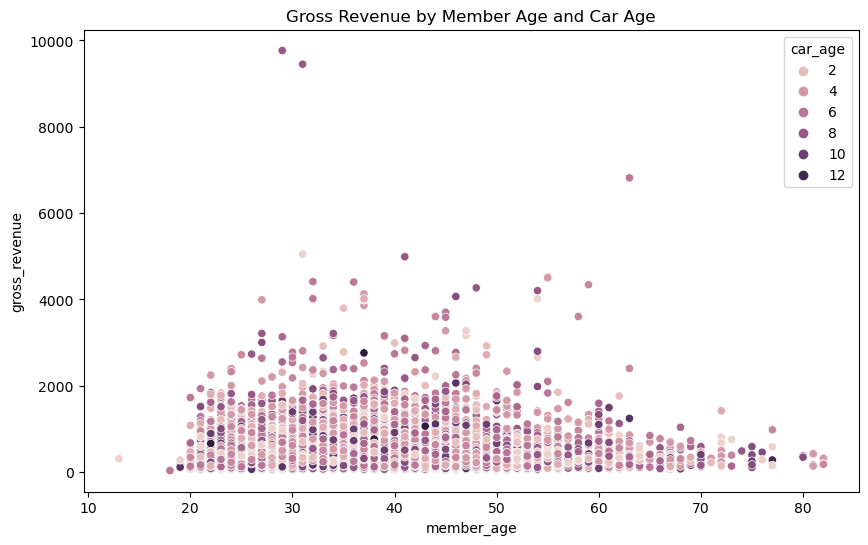

In [75]:
# Scatterplot of member age and car age against gross revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='member_age', y='gross_revenue', hue='car_age', data=data)
plt.title('Gross Revenue by Member Age and Car Age')
plt.show()



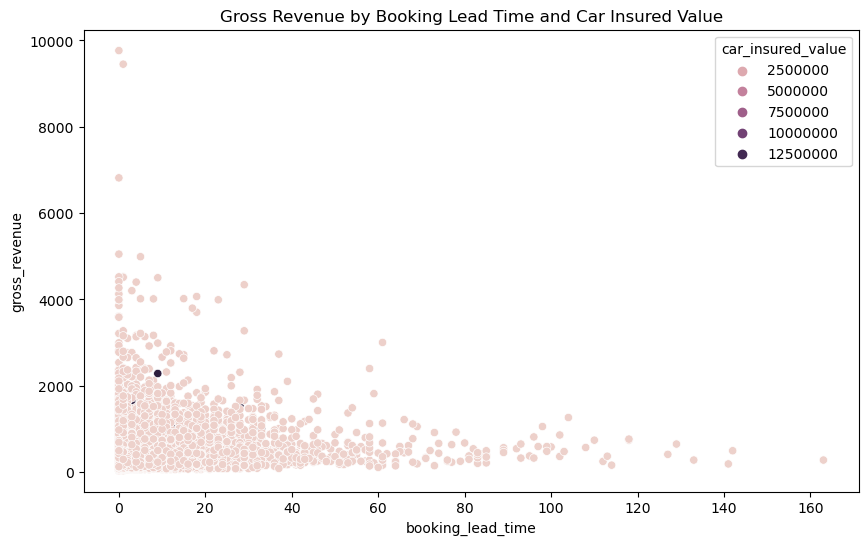

In [76]:
# Scatterplot of booking lead time and car insured value against gross revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='booking_lead_time', y='gross_revenue', hue='car_insured_value', data=data)
plt.title('Gross Revenue by Booking Lead Time and Car Insured Value')
plt.show()

In [77]:
# Feature Engineering and calculate booking lead time

data['booking_lead_time'] = (data['request_start_datetime'] - data['first_created_datetime']).dt.days
data['booking_duration'] = (data['request_end_datetime'] - data['request_start_datetime']).dt.days
data['lag_time'] = (data['first_created_datetime'] - data['signup_datetime']).dt.days

grouped_data = data.groupby('member_id').agg(
    total_bookings=pd.NamedAgg(column='booking_id', aggfunc='count'),
    average_gross_basket_size=pd.NamedAgg(column='gross_revenue', aggfunc='mean'),
    average_booking_lead_time=pd.NamedAgg(column='booking_lead_time', aggfunc='mean'),
    average_booking_duration=pd.NamedAgg(column='booking_duration', aggfunc='mean'),
    average_delivery_fee=pd.NamedAgg(column='delivery_fee', aggfunc='mean'),
    lag_time_to_MFT=pd.NamedAgg(column='lag_time', aggfunc='mean'),
    member_age=pd.NamedAgg(column='member_age', aggfunc='first'),  
)

In [78]:
# K-Means Clustering and Standardize the data

grouped_data = grouped_data.fillna(grouped_data.mean())

scaler = StandardScaler()
scaled_features = scaler.fit_transform(grouped_data)

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
grouped_data['Cluster'] = cluster_labels

for cluster in set(cluster_labels):
    print(f'\nCustomer Profile for Cluster {cluster}:')
    print(grouped_data[grouped_data['Cluster'] == cluster].mean())


/opt/anaconda3/envs/ai361/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Customer Profile for Cluster 0:
total_bookings                 1.463469
average_gross_basket_size    259.490954
average_booking_lead_time     17.980573
average_booking_duration       1.274279
average_delivery_fee           9.355500
lag_time_to_MFT               47.634480
member_age                    28.785314
Cluster                        0.000000
dtype: float64

Customer Profile for Cluster 1:
total_bookings                 1.432801
average_gross_basket_size    634.138841
average_booking_lead_time     21.130353
average_booking_duration       3.321246
average_delivery_fee          13.577559
lag_time_to_MFT               43.108393
member_age                    40.505936
Cluster                        1.000000
dtype: float64

Customer Profile for Cluster 2:
total_bookings                 4.964257
average_gross_basket_size    333.503567
average_booking_lead_time    433.399381
average_booking_duration       1.825963
average_delivery_fee          12.261970
lag_time_to_MFT               6

In [84]:
# Let's define the first booking date for each user
data['first_booking_date'] = data.groupby('member_id')['first_created_datetime'].transform('min')

# Now, let's find the users who made a booking within the first 90 days from their first booking
data['booking_within_90_days'] = np.where((data['first_created_datetime'] - data['first_booking_date']).dt.days <= 90, 1, 0)

# Calculate the retention rate
retention_rate = data['booking_within_90_days'].sum() / data['member_id'].nunique()
print(f"Retention Rate: {retention_rate:.2f}")


Retention Rate: 1.76


In [87]:
# Calculate the total number of bookings and the number of unique users in the first 90 days
total_bookings = data[data['booking_within_90_days'] == 1]['booking_id'].nunique()
unique_users = data[data['booking_within_90_days'] == 1]['member_id'].nunique()

# Revisit Ratio is the total number of bookings divided by the number of unique users
revisit_ratio = total_bookings / unique_users
print(f"Revisit Ratio: {revisit_ratio:.2f}%")


Revisit Ratio: 1.76%


In [91]:
# First, ensure that your 'created_datetime' and 'first_created_datetime' columns are in datetime format

data['first_created_datetime'] = pd.to_datetime(data['first_created_datetime'])

# Define the users' first 90 days period
data['first_90_days'] = data['first_created_datetime'] + pd.DateOffset(days=90)

# Identify the bookings within first 90 days
data['booking_within_90_days'] = np.where(data['first_created_datetime'] <= data['first_90_days'], 1, 0)

# Get all members who have bookings within the first 90 days
members_first_90_days = data[data['booking_within_90_days'] == 1]['member_id'].unique()

# Get all members who have bookings after the first 90 days
members_after_90_days = data[data['first_created_datetime'] > data['first_90_days']]['member_id'].unique()

# Members who are in the first list but not in the second one are considered churned
churned_members = len(set(members_first_90_days) - set(members_after_90_days))

# Total number of unique members
total_members = data['member_id'].nunique()

# Churn rate calculation
churn_rate = churned_members / total_members
print(f"Churn Rate: {churn_rate}")


Churn Rate: 1.0
